In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_theme(style="darkgrid")

In [2]:
def create_dataframe(values):
  df_values = pd.DataFrame({
      'num_medicao': list(range(1, len(values['serial']) + 1)) * 2,
      'medicao': values['serial'] + values['threads'],
      'tipo': ['serial' for i in range(len(values['serial']))] + ['threads' for i in range(len(values['threads']))]
  })

  return df_values

In [3]:
class BarGraph:

  def __init__(self, df_values, width, height):
    self.df_values = df_values
    self.width = width
    self.height = height
  
  def _set_size(self):
    plt.figure(figsize=(self.width, self.height))

  def save(self, name, path='', format='png'):
    plt.savefig('{}{}.{}'.format(path, name, format))

  def generate_bargraph(self):
    self._set_size()
    g = sns.barplot(x='num_medicao', y='medicao', hue='tipo', data=self.df_values, palette='Blues_d', ci=None)
    for i in g.patches:
      g.annotate(i.get_height(), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='baseline', xytext=(0,1), textcoords='offset points')
     

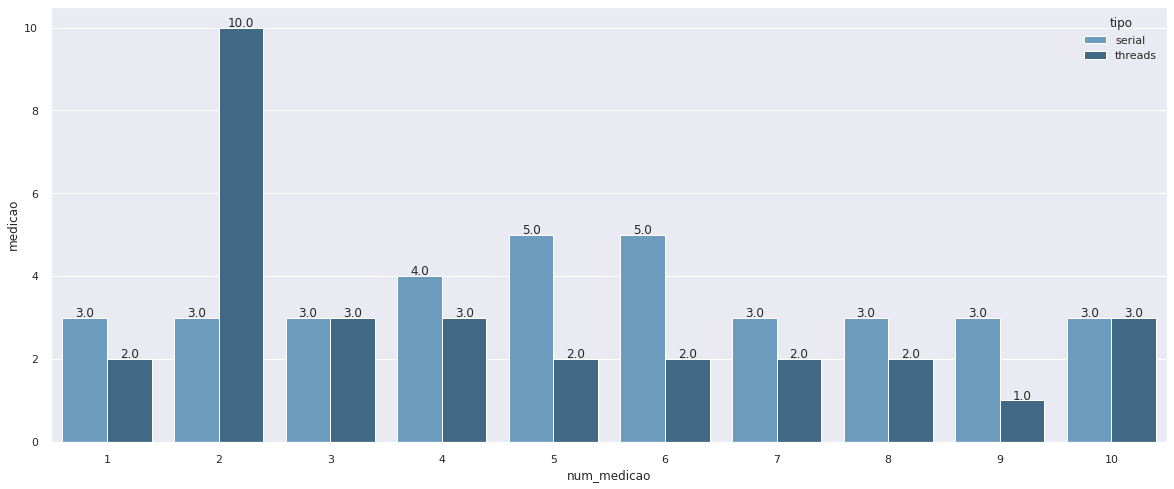

In [4]:
medicoes_dna = {
    'serial': [3, 3, 3, 4, 5, 5, 3, 3, 3, 3],
    'threads': [2, 10, 3, 3, 2, 2, 2, 2, 1, 3]
}

df_medicoes_dna = create_dataframe(medicoes_dna)
graph2 = BarGraph(df_medicoes_dna, 20, 8)
graph2.generate_bargraph()
graph2.save(name='dna')